# Project: Medical Insurance Cost Prediction

## Table of Contents

1. [Importing Packages](#section-one)   

2. [Loading the Raw Data](#section-two)

3. [Data Exploration](#section-three)

4. [Data Pre-Processing](#section-four)

    * [Dealing with Outliers](#section-four-one)
    * [Exploring the Categorical Features](#section-four-two)
    * [Splitting the Features and Target](#section-four-three)
    * [Splitting the data into Training and Testing data](#section-four-four)


5. [Model Training](#section-five)

    * [Linear Regression](#section-five-one)
    * [Model Evaluation](#section-five-two)


6. [Building a Predictive System.](#section-six)

<a id="section-one"></a>
# 1. Importing Packages

In [1]:
# relevant libraries for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

<a id="section-two"></a>
# 2. Loading the raw data

We have taken the data of medical health insurance from Kaggle. The file is named 'insurance.csv' and we will be using module 'pandas' to load it.

In [2]:
# Panda dataframe

raw_data = pd.read_csv('C:\\Users\\Nishant Gupta\\Desktop\\Projects\\regression_project_Nishant_Gupta\\insurance.csv')

# Let's have a quick look at the dataset

raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Here, we have the first 5 rows of the given dataset to have a look at it and understand it. We are going to predict the 'charges' so it will become the target and rest columns are the features!

In [3]:
# let's check the number of rows and columns in the dataset

raw_data.shape

(1338, 7)

We have 1338 rows and 7 columns in the dataset.

In [4]:
# Some more information about the dataset

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# let's check the descriptive statistics of the variables

raw_data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Here, we understand that categorical variables don't have some types of numerical descriptives and numerical variables don't have some types of categorical descriptives. Therefore, we have 3 categorical variables (features) in this dataset: Sex, Smoker, and Region.

In [6]:
# Checking the total number of missing values

raw_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Great! We do not have any missing values and won't have to drop any variables.

In [7]:
# We have checked the raw data and there aren't any missing values!

data_no_mv = raw_data.copy()

<a id="section-three"></a>
# 3. Data Exploration

Displaying the probability distribution function (PDF) of a variable is a fantastic data exploration step. We will see how that variable is spread in the PDF. This makes it very simple to identify outliers and other irregularities. Frequently, the PDF also serves as the foundation for our decision over whether to alter a feature.

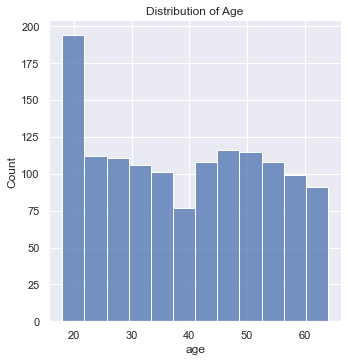

In [8]:
# distribution of age variable

sns.displot(data_no_mv['age'])
plt.title('Distribution of Age')
plt.show()

As the figure represents that the highest density of people is of age 20-23. From age 24 to 70, the distribution is almost equal.

<function matplotlib.pyplot.show(close=None, block=None)>

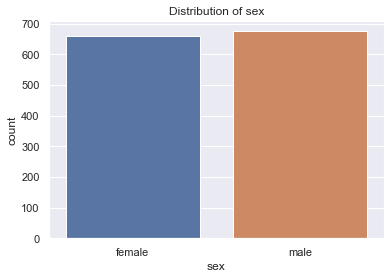

In [9]:
# plot of sex variables

sns.countplot(x = 'sex', data = data_no_mv)
plt.title('Distribution of sex')
plt.show

Firstly, we are using 'sns.countplot' because 'sex' is a categorical variables and to represent in a better way.
The figure shows that the number of male and female is almost equal.

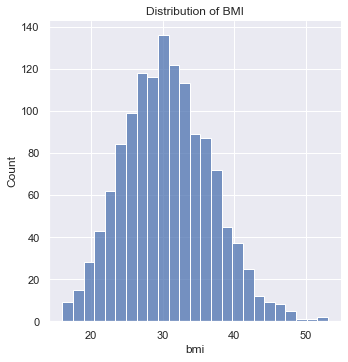

In [10]:
# distribution of bmi variable

sns.displot(data_no_mv['bmi'])
plt.title('Distribution of BMI')
plt.show()

This kind of distribution is normal distribution. The figure shows that we have an gradual increase from 15 to reach the peak values of 30. Then there is a gradual decrease. We may also notice very few outliers and we will take care of them later.

According to the research,
Normal BMI range is 18.5 to 24.9. A person exceeding the limit is overweight and the person below this limit is underweight. We could see that there are more number of people in this dataset that are overweight!

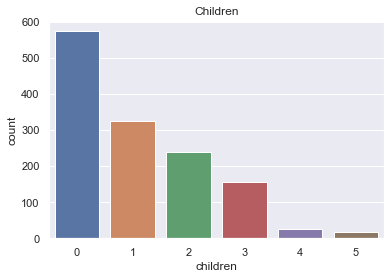

In [11]:
# plot of children variable

sns.countplot(x = 'children', data = data_no_mv)
plt.title('Children')
plt.show()

According to the figure, there are more number of people with no children. Then there are people having 1-3 children and there are very less people having 4-5 children.

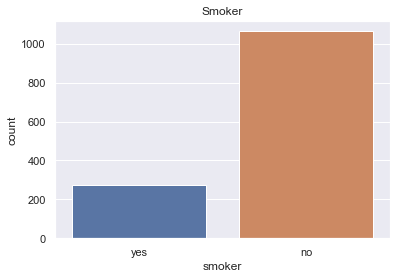

In [12]:
# plot of smoker variable

sns.countplot(x = 'smoker', data = data_no_mv)
plt.title('Smoker')
plt.show()

In this dataset, there are more non-smokers than smokers.

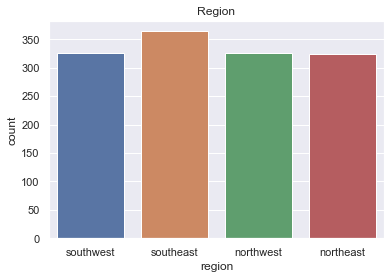

In [13]:
# plot of region variable

sns.countplot(x = 'region', data = data_no_mv)
plt.title('Region')
plt.show()

We have four regions: Southwest, Southeast, Northwest, and Northeast. People are equally distributed in all the regions with southeast having slightly more number of people than other regions.

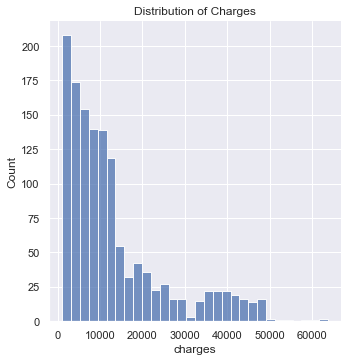

In [14]:
# distribution of charges variable

sns.displot(data_no_mv['charges'])
plt.title('Distribution of Charges')
plt.show()

Mostly, the charges are around 1000-10,000 dollars.

<a id="section-four"></a>
# 4. Data Pre-Processing

<a id="section-four-one"></a>
## Dealing with outliers

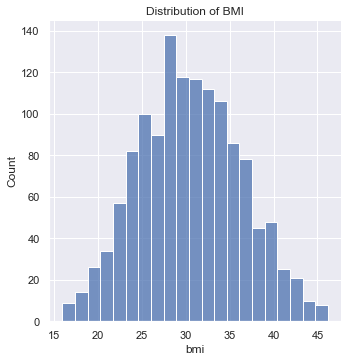

In [15]:
# Obviously there are some outliers present, as seen in the graph of BMI and charges

# removing the ouliers in bmi feature
q = data_no_mv['bmi'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['bmi']<q]

# let's have a look at the distribution graph again
sns.displot(data_1['bmi'])
plt.title('Distribution of BMI')
plt.show()

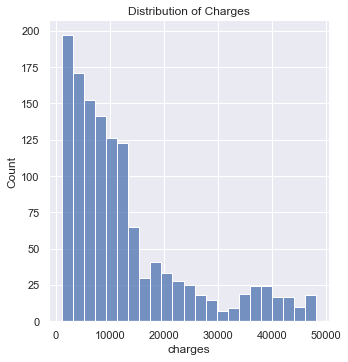

In [16]:
# removing the ouliers in charges feature
q = data_1['charges'].quantile(0.99)
data_2 = data_1[data_1['charges']<q]

# let's have a look at the distribution graph again
sns.displot(data_2['charges'])
plt.title('Distribution of Charges')
plt.show()

<a id="section-four-two"></a>
## Encoding the categorical features

In [17]:
# Categorical features: Sex, Smoker, and Region.

data = data_2.copy()

data['sex'] = data['sex'].map({'male':0, 'female':1})

data['smoker'] = data['smoker'].map({'yes':1, 'no':0})

data['region'] = data['region'].map({'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3})

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


<a id="section-four-three"></a>
## Splitting the Features and Targets

In [18]:
# declare the variables

y = data['charges']
x = data.drop(columns='charges', axis=1)

In [19]:
# let's have a look at the target variables

print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1310, dtype: float64


In [20]:
# let's have a look at the features

print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1310 rows x 6 columns]


<a id="section-four-four"></a>
## Splitting the data into training data & testing data

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [22]:
# By looking at the shape, we could see the number of observations which are training and testing

print(x.shape, x_train.shape, x_test.shape)

(1310, 6) (1048, 6) (262, 6)


<a id="section-five"></a>
# 5. Model Training

<a id="section-five-one"></a>
## Linear Regression

In [23]:
# Check the regression

reg = LinearRegression()
reg.fit(x_train.values, y_train.values)

LinearRegression()

<a id="section-five-two"></a>
## Model Evaluation

In [24]:
# prediction on training data

train_data_pred = reg.predict(x_train.values)

In [25]:
# R squared value

from sklearn import metrics

r2_train = metrics.r2_score(y_train, train_data_pred)

print('R squared value: ',r2_train)

R squared value:  0.7426233236305814


In [26]:
# prediction on testing data

test_data_pred = reg.predict(x_test.values)

In [27]:
# R squared value

r2_test = metrics.r2_score(y_test, test_data_pred)

print('R squared value: ',r2_test)

R squared value:  0.7398444651162962


Text(0.5, 1.0, 'Residuals PDF')

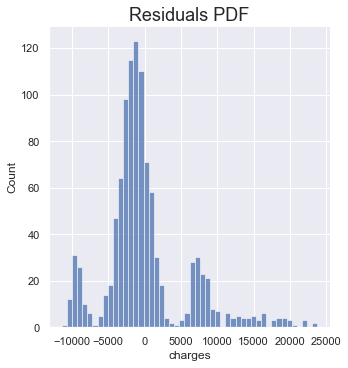

In [28]:
# Residual = Differences between the targets and the predictions
# The residuals are the estimate of errors

sns.displot(y_train - train_data_pred)
plt.title('Residuals PDF', size = 18)

<a id="section-six"></a>
# 6. Building a Predictive System

In [29]:
# we select the random features in order to machine to predict respective charges 
# we will also put the values assigned to categorical varibales

# features used: age:31, sex:female, bmi:25.74, children:0, smoker:no, region:southeast

input_data = (31, 1, 25.74, 0, 0, 0)

In [30]:
# changing inupt_data into numpy array

array_data = np.asarray(input_data)

In [31]:
# reshape the array

array_data_reshaped = array_data.reshape(1,-1)

In [32]:
prediction = reg.predict(array_data_reshaped)

print('The insurance charge is $',prediction)

The insurance charge is $ [3859.84483333]


The original price is 3756.8552. Our model's predictions are close to the original price, therefore the model is complete. 

That's all and thank you! I hope you liked my linear regression model and prediction with ML project. Please do let me know your reviews and advices in the comments :))